# Delhi Weather 

# Introduction

In this project we will analysis delhi weather. the Csv file contains 100990 row & about 20 columns issuing the Delhi' climate from 19961 till 2017. The analysis will be performed through these questions:

1- Does the temperature differeniate over years ?

2- Is there a relation between temperature & humudity ?

3- What are the most common frequent degrees ?

4- What is the different conditions types?

5- What are the common wind direction?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Delhi_weather_file.csv')

Importing the CSV file

# Data Wrangling 

In this section, we will discover the dataset & see its distribution 

In [3]:
df.head(1)

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4


Overviewing the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

Data contains 100990 row & 20 column
12 columns are missing some data & 1 cloumn are blank

In [7]:
df.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


Most of values in some columns are zero 

array([[<AxesSubplot:title={'center':' _dewptm'}>,
        <AxesSubplot:title={'center':' _fog'}>,
        <AxesSubplot:title={'center':' _hail'}>,
        <AxesSubplot:title={'center':' _heatindexm'}>],
       [<AxesSubplot:title={'center':' _hum'}>,
        <AxesSubplot:title={'center':' _precipm'}>,
        <AxesSubplot:title={'center':' _pressurem'}>,
        <AxesSubplot:title={'center':' _rain'}>],
       [<AxesSubplot:title={'center':' _snow'}>,
        <AxesSubplot:title={'center':' _tempm'}>,
        <AxesSubplot:title={'center':' _thunder'}>,
        <AxesSubplot:title={'center':' _tornado'}>],
       [<AxesSubplot:title={'center':' _vism'}>,
        <AxesSubplot:title={'center':' _wdird'}>,
        <AxesSubplot:title={'center':' _wgustm'}>,
        <AxesSubplot:title={'center':' _windchillm'}>],
       [<AxesSubplot:title={'center':' _wspdm'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

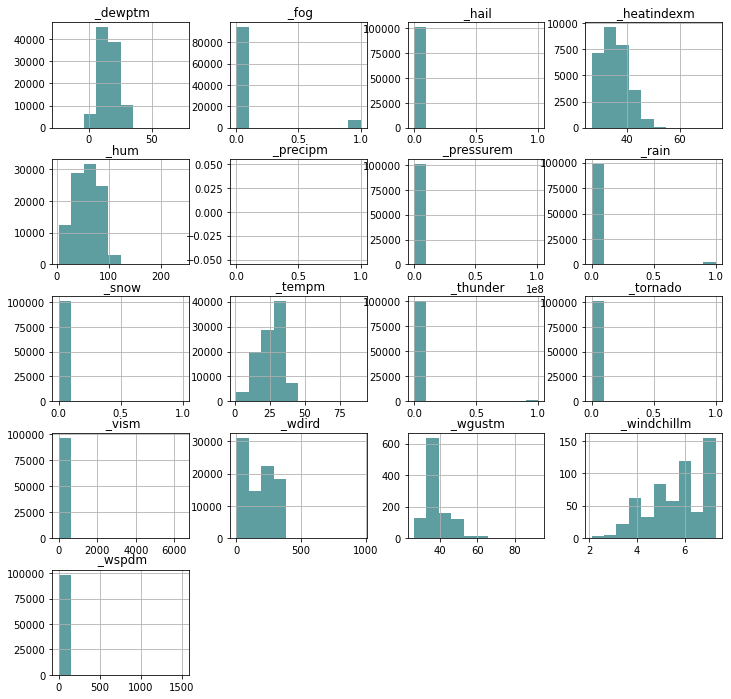

In [10]:
df.hist(figsize=(12,12), color='cadetblue') 

View the data distribution to assure what we found before & gonna see how we will deal with this dataset

# Data Cleaning

In [11]:
df.rename(columns={'datetime_utc':'datetime'}, inplace=True)

Change the name of column datetime_utc to be datetime

In [12]:
df.rename(columns=lambda x: x.replace('_', ''), inplace=True)

In [13]:
df.head(1)

,datetime,conds,dewptm,fog,hail,heatindexm,hum,precipm,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wgustm,windchillm,wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4


Reviewing the header to make sure that all changes have been applied

In [14]:
df.drop([' heatindexm', ' precipm'],axis=1, inplace=True)

In [15]:
df.drop([' rain', ' snow', ' thunder', ' tornado', ' vism', ' wdird', ' wgustm', ' windchillm', ' wspdm'],axis=1, inplace=True)

Remove the unnecessary columns 

In [17]:
df[' tempm'].fillna(df[' tempm'].mean(),inplace=True)
df[' tempm'].isnull().sum()

0

Fill missing values in 'temperature' column with the mean

In [18]:
df[' hum'].fillna(df[' hum'].mean(),inplace=True)
df[' hum'].isnull().sum()

0

Fill missing values in 'humudity' column with the mean

In [19]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [20]:
df['datetime'] = df['datetime'].dt.year

Transfer datetime column to be year datetime

In [21]:
df.head(1)

,datetime,conds,dewptm,fog,hail,hum,pressurem,tempm,wdire
0,1996,Smoke,9.0,0,0,27.0,1010.0,30.0,West


Rewiewing the header again

# Data Visualization

In this part we gonaa process our analytical questions via visuals

# 1- Does the temperature differeniate over years ?

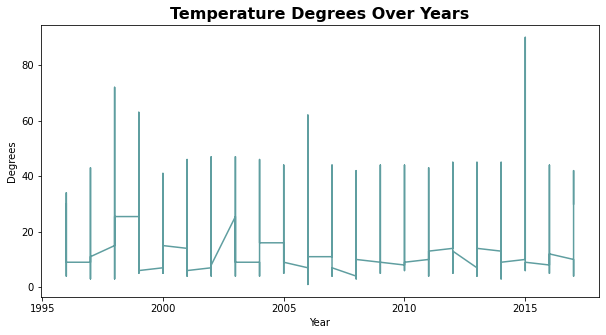

In [22]:
plt.plot(df['datetime'], df[' tempm'], color='cadetblue')
plt.title('Temperature Degrees Over Years',fontsize=16, fontdict={"weight": "bold"})
plt.xlabel('Year')
plt.ylabel('Degrees')
plt.gcf().set_size_inches(10,5)


We could see that the temperature differeniate over years normaly except 2015 was high record

# 2- Is there a relation between temperature & humudity ?

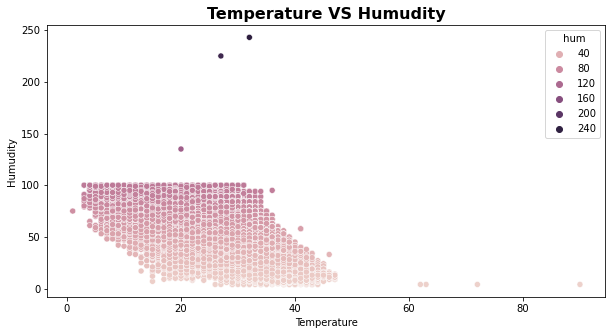

In [23]:
sns.scatterplot(data=df, x=' tempm', y=' hum', hue=' hum')
plt.title('Temperature VS Humudity',fontsize=16, fontdict={"weight": "bold"})
plt.xlabel('Temperature')
plt.ylabel('Humudity')
plt.gcf().set_size_inches(10,5)


There is no specific relation between temperature degrees & humudity in this report 

# 3- What are the most common frequent degrees ?

Text(0.5, 1.0, 'Highest Degrees Frequency')

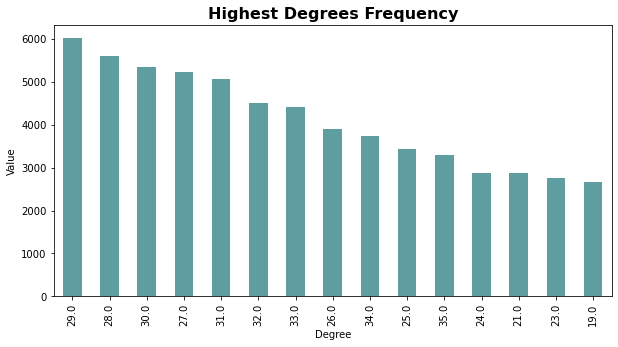

In [24]:
freq_temp = df[' tempm'].value_counts().head(15).sort_values(ascending=False)
freq_temp.plot(kind='bar', figsize=(10,5), color='cadetblue')
plt.xlabel('Degree')
plt.ylabel('Value')
plt.title('Highest Degrees Frequency', fontsize=16, fontdict={'weight':'bold'})

29, 28, & 30 are the most common temperature degrees over years & that is mean the Delhi has nearly hot climate 

# 4- What is the different conditions types?

Text(0, 0.5, ' Value')

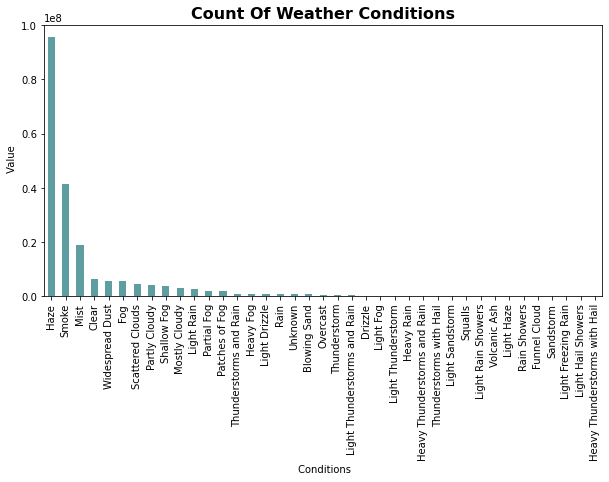

In [25]:
conds_count = df.groupby(' conds').datetime.sum().sort_values(ascending=False)
conds_count.plot(kind='bar', color='cadetblue', figsize=(10,5))
plt.title('Count Of Weather Conditions',fontsize=16, fontdict={"weight": "bold"})
plt.xlabel(' Conditions')
plt.ylabel(' Value')

Haze & smoke are the most frequent climate condtion as shown above 

# 5- What are the common wind direction?

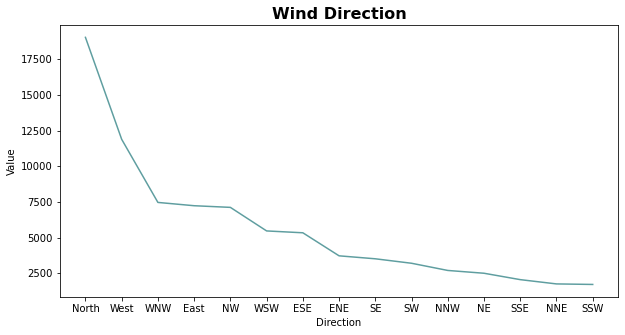

In [26]:
wind_dir = df[' wdire'].value_counts().head(15).sort_values(ascending=False)
sns.lineplot(data=wind_dir,color='cadetblue')
plt.xlabel('Direction')
plt.ylabel('Value')
plt.title('Wind Direction', fontsize=16, fontdict={'weight':'bold'})
plt.gcf().set_size_inches(10,5)

Mostly the wind blows from north & west in Delhi 

# Conclusion 

As we could assume from our analysis, here are the climate's aspects in Delhi:

>1- Most of time temeprature degrees are hot & sometimes it reached 60ºC & more 
>
>2- Wind almostly blows from north
>
>3- Haze is the most frequent condition


# Limitation

>1- Most of columns are with zero values, so I removed them, but if there was a true data, the analysis would be more effective
>
>2- Columns with true data was missing a lot of data 